In [1]:
def tensor2tract(struct_tensor, is_fsl = False):
    if is_fsl:
        tmp = np.copy(struct_tensor[:,:,:,3])
        struct_tensor[:,:,:,3] = struct_tensor[:,:,:,2]
        struct_tensor[:,:,:,2] = tmp
    output = from_lower_triangular(struct_tensor)
    #output = output[300:500, 250:350, 400:800, :, :]

    
    evals, evecs = decompose_tensor(output)

    FA = fractional_anisotropy(evals)

    RGB = color_fa(FA, evecs)
    # nb.save(nb.Nifti1Image(np.array(255 * RGB, 'uint8'), result.get_affine()), 'fsl_tensor_rgb_upper.nii.gz')

    #affine = struct_tensor.get_affine()
    fa = nib.Nifti1Image(np.array(255 * RGB, 'uint8'), affine)
    im = fa.get_data()

    fig = plot_rgb(im)
    plt.savefig('tensor_field_brain.png')


    sphere = get_sphere('symmetric724')
    peak_indices = quantize_evecs(evecs, sphere.vertices)
    eu = EuDX(FA.astype('f8'), peak_indices, seeds=50000, odf_vertices = sphere.vertices, a_low=0.2)
    tensor_streamlines = [streamline for streamline in eu]
    return tensor_streamlines


import yt
import numpy as np
import matplotlib.pylab as pl
from yt.visualization.api import Streamlines
from mpl_toolkits.mplot3d import Axes3D

#streamlines = fibs

def streamplot(streamlines):
    fig=pl.figure()
    ax = Axes3D(fig)
    for stream in streamlines:
         #stream = stream[np.all(stream != 0.0, axis=1)]
         ax.plot3D(stream[:,0], stream[:,1], stream[:,2], alpha=0.1)
    pl.savefig('streamlines.png')
    return fig

In [3]:
%matplotlib inline

In [4]:
import numpy as np
from dipy.data import get_data
from nibabel import trackvis

In [5]:
streams, hdr = trackvis.read('/root/CTT/demo/result/dog1gau0.5/fiber_ang45.trk')
streamlines = [s[0] for s in streams]

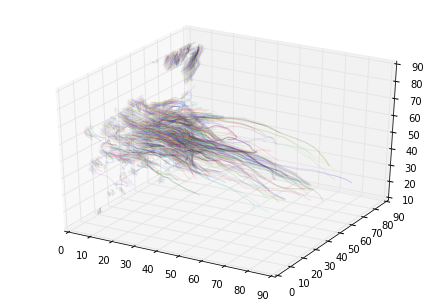

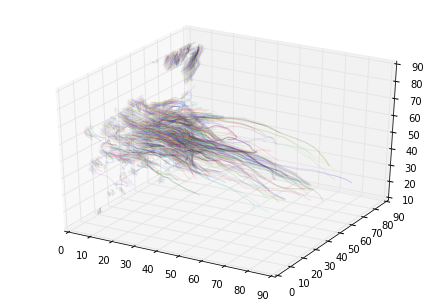

In [6]:
streamplot(streamlines)